In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/cardio_train.csv', sep= ';')

In [8]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [9]:
data.drop('id', axis = 1, inplace=True)

In [10]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data.drop_duplicates(inplace = True)

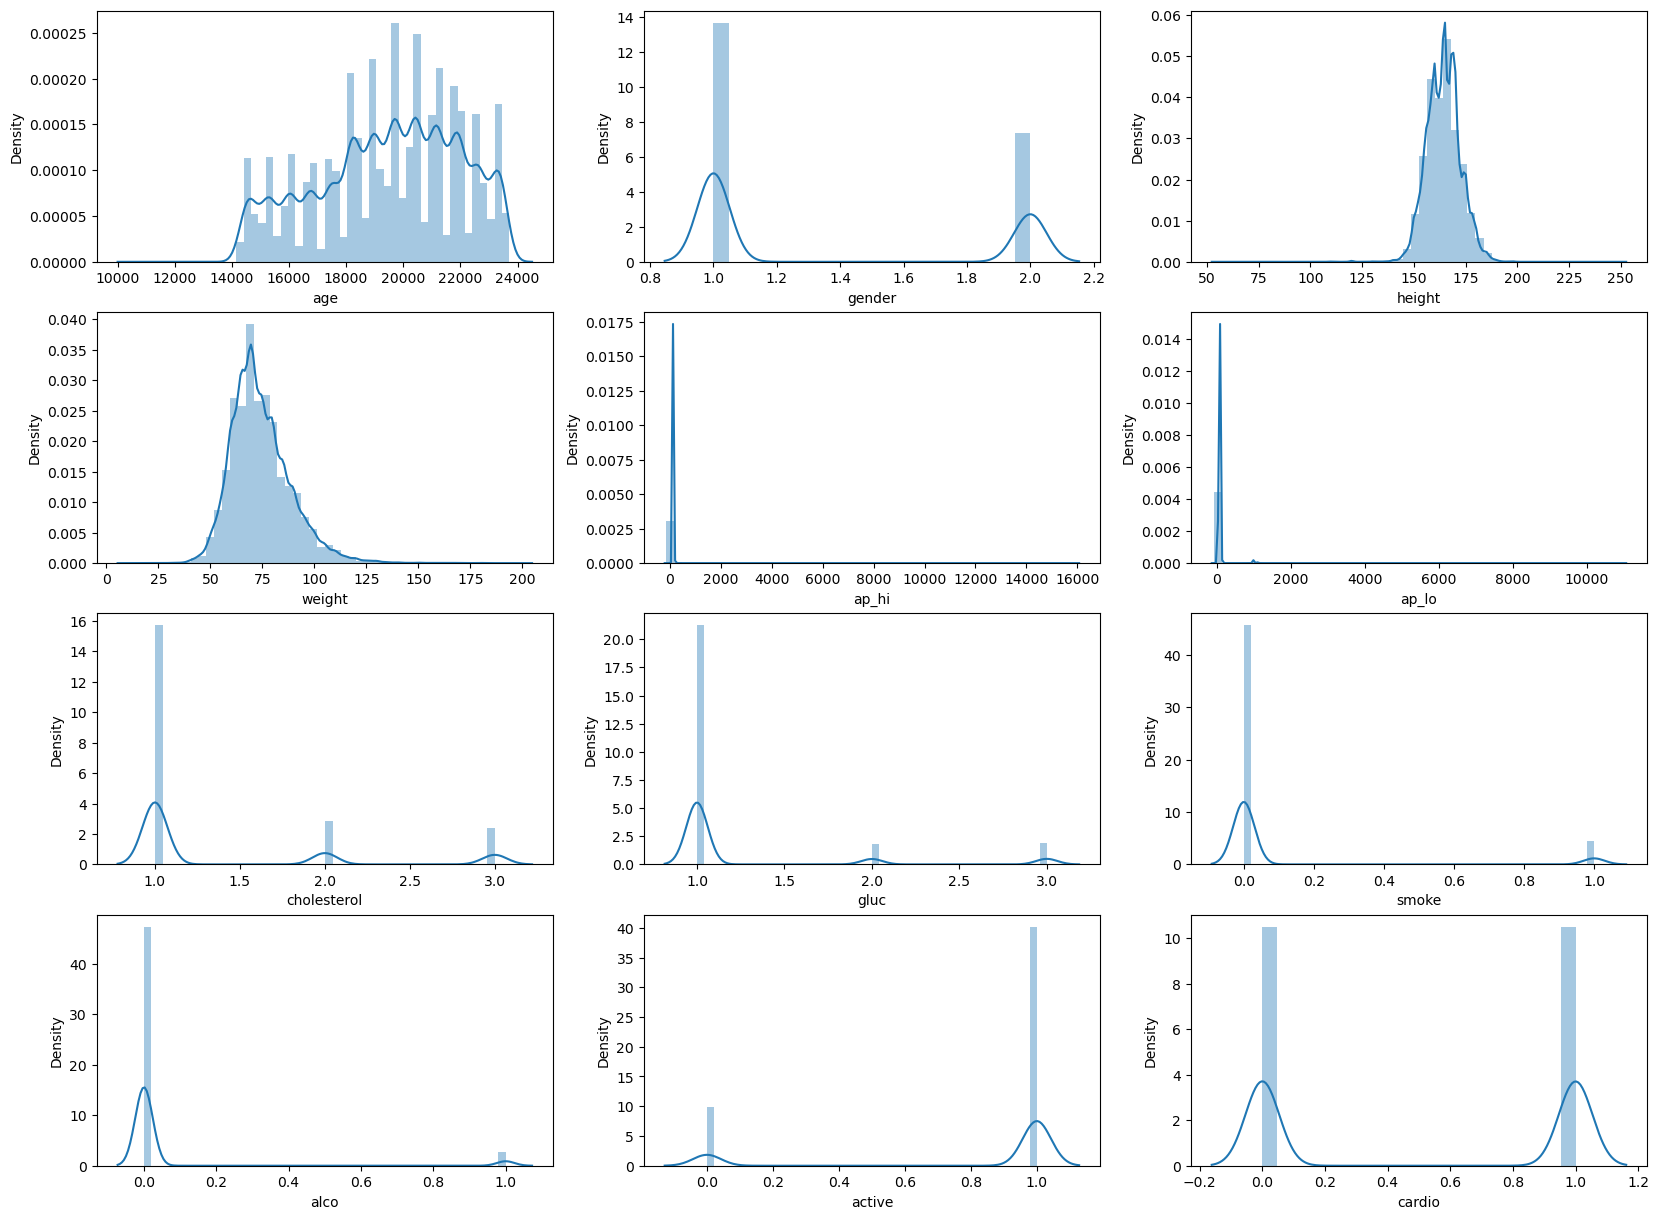

In [13]:
plt.figure(figsize =(20,15))
plotnumber = 1

for column in data:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1    

In [14]:
from scipy.stats import zscore

In [15]:
z_score = zscore(data[['age','gender','height','weight','ap_hi','ap_lo','cholesterol']])

In [16]:
z_score

,age,gender,height,weight,ap_hi,ap_lo,cholesterol
0,1.215923,-0.733149,-1.140837,-0.361901,0.007540,-0.088068,0.930504
1,-1.953852,-0.733149,-0.165986,-0.222866,-0.121658,-0.140942,-0.539330
2,0.985718,-0.733149,0.077727,-0.292383,-0.057059,-0.088068,-0.539330
3,-1.993975,1.363980,0.077727,0.750382,-0.057059,-0.088068,-0.539330
4,1.590411,-0.733149,-1.140837,-0.848525,-0.057059,-0.088068,-0.539330
...,...,...,...,...,...,...,...
69296,-0.092759,1.363980,0.443297,0.124723,-0.057059,-0.088068,-0.539330
69297,1.269421,-0.733149,-0.775268,3.600606,0.072139,-0.035193,0.930504
69298,-0.163280,1.363980,2.271143,2.140735,0.330535,-0.035193,2.400338
69299,1.200522,-0.733149,-0.165986,-0.153348,0.039840,-0.088068,-0.539330


In [17]:
abs_z_score = np.abs(z_score)

In [19]:
filter_entry = (abs_z_score<3).all(axis=1)

In [21]:
data= data[filter_entry]

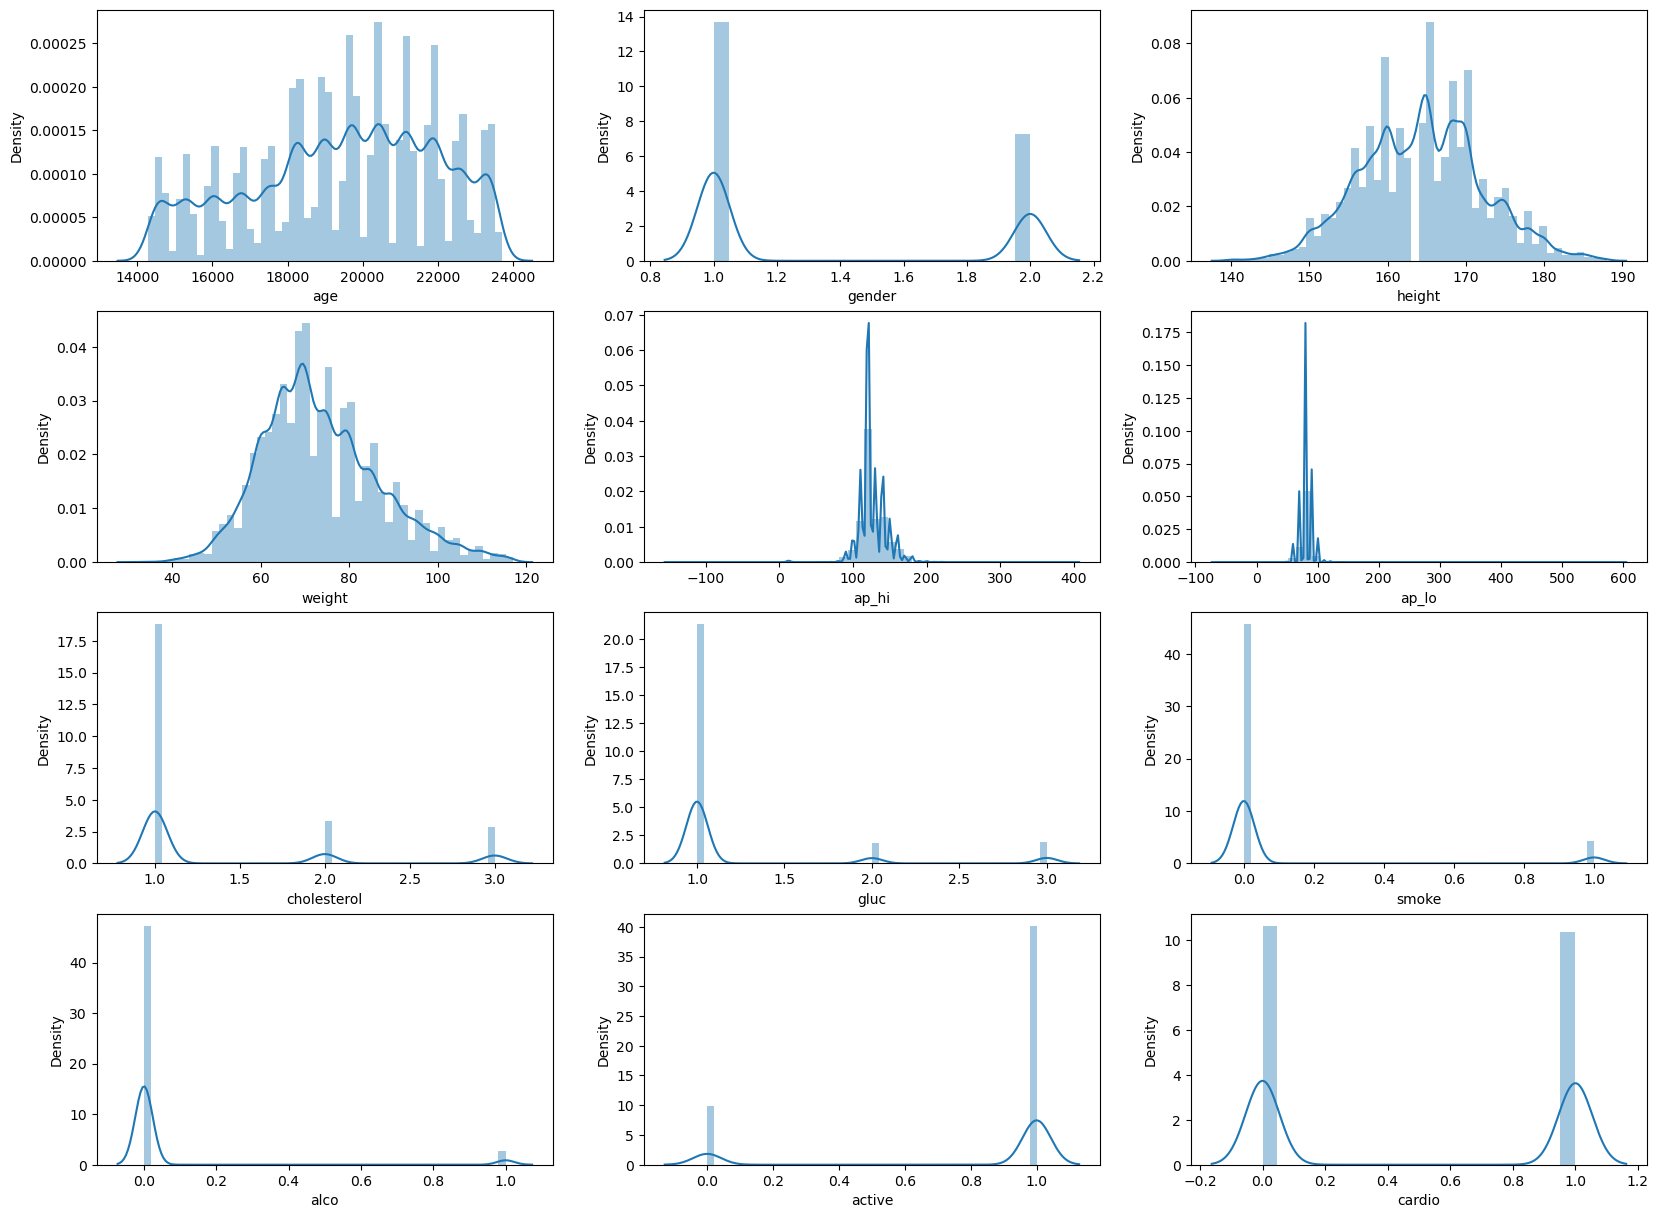

In [22]:
plt.figure(figsize =(20,15))
plotnumber = 1

for column in data:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1 

In [23]:
data_corr = data.corr()

<AxesSubplot:>

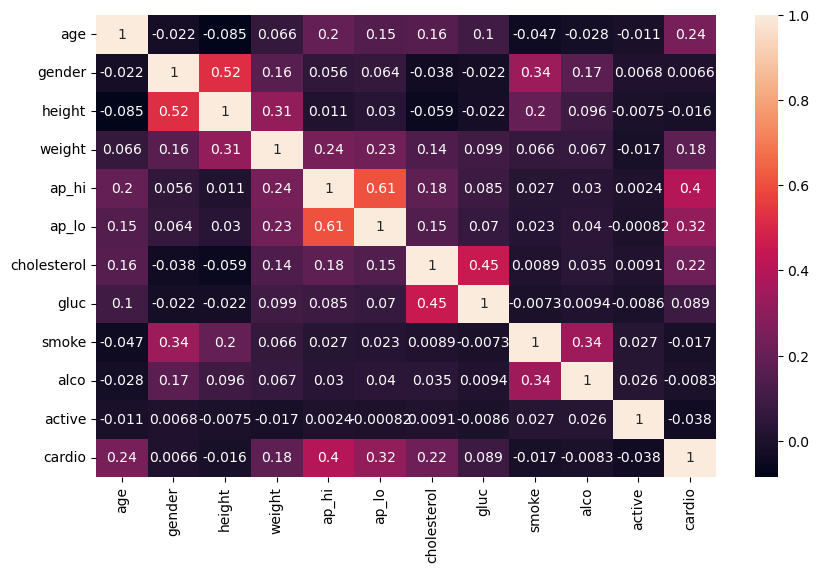

In [26]:
plt.figure(figsize = (10,6))
sns.heatmap(data_corr,annot=True)

<AxesSubplot:>

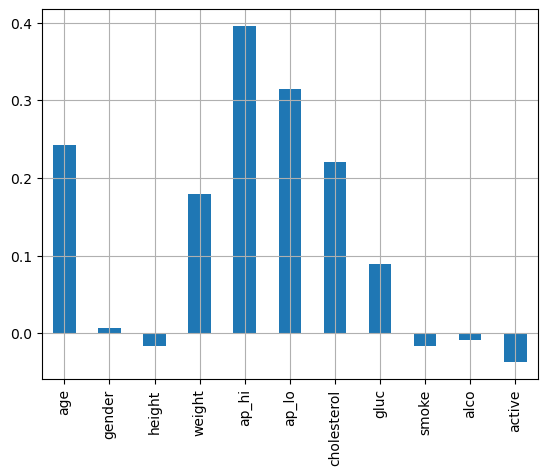

In [27]:
data.drop('cardio', axis=1).corrwith(data.cardio).plot(kind='bar',grid=True)